# Exercise with Natural Language Processing

For todays exersice we will be doing two things.  The first is to build the same model with the same data that we did in the lecture, the second will be to build a new model with new data. 

## PART 1: 
- 20 Newsgroups Corpus
0. Inspect data
0. Clean and Process Text
0. Vectorize your text
0. Classify your text using Multinomial Naive Bayes
0. Classify your text using Random Forest. 
0. Eval your models.  
0. Classify a NEW PIECE of text. Any string you want to feed it. 


## PART 2:
- Republican vs Democrat Tweet Classifier
0.  This is self guided, can you get a f1 above 82%?  -its not easy.

In [19]:
## IMPORT YOUR LIBS HERE

import pandas as pd # pandas

# NLTK is our Natural-Language-Took-Kit
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

# Import our text vectorizers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer


# Import our classifiers
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier


# Import some ML helper function
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report

# Import our metrics to evaluate our model
from sklearn import metrics


# Library for plotting
import matplotlib.pyplot as plt
import seaborn as sns


# Libraries for helping us with text
import string
# Regular Expression Library
import re

import nltk 
# You may need to download these from nltk
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
stopwords = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyzhu/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyzhu/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /Users/anthonyzhu/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


## Load and display data.
1. Load the 20-newsgroups.csv data into a dataframe.
1. Print the shape
1. Inspect / remove nulls and duplicates
1. Find class balances, print out how many of each topic_category there are.

In [10]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/20-newsgroups.csv')
print(df.shape)
df.head()

(11314, 4)


,id,message,topic,topic_category
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space


In [18]:
# 3. Inspect / remove nulls and duplicates
print("Nulls in Dataframe:")
print(df.isnull().sum())

print("Duplicates in Dataframe:")
print(df.duplicated().sum())

Nulls in Dataframe:
id                0
message           0
topic             0
topic_category    0
dtype: int64
Duplicates in Dataframe:
0


In [20]:
# 4. Find class balances, print out how many of each topic_category there are.
df.topic_category.value_counts()

rec.sport.hockey            600
soc.religion.christian      599
rec.motorcycles             598
rec.sport.baseball          597
sci.crypt                   595
rec.autos                   594
sci.med                     594
comp.windows.x              593
sci.space                   593
comp.os.ms-windows.misc     591
sci.electronics             591
comp.sys.ibm.pc.hardware    590
misc.forsale                585
comp.graphics               584
comp.sys.mac.hardware       578
talk.politics.mideast       564
talk.politics.guns          546
alt.atheism                 480
talk.politics.misc          465
talk.religion.misc          377
Name: topic_category, dtype: int64

# Text Pre-Processing 
(aka Feature engineering)
1. Make a function that makes all text lowercase.
    * Do a sanity check by feeding in a test sentence into the function. 
    
    
2. Make a function that removes all punctuation. 
    * Do a sanity check by feeding in a test sentence into the function. 
    
0. EXTRA CREDIT:  
    0. Make a function that stemms all words. 
    0. Make a function that removes all stopwords.

5. Mandatory: Make a pipeline function that applys all the text processing functions you just built.
    * Do a sanity check by feeding in a test sentence into the pipeline. 
    
6. Mandatory: Use `df['message_clean'] = df[column].apply(???)` and apply the text pipeline to your text data column. 

In [21]:
# 1. Make a function that makes all text lowercase.

test_string = 'This is A SENTENCE with LOTS OF CAPS.'

def toLower(string):
    return string.lower()

toLower(test_string)

'this is a sentence with lots of caps.'

In [22]:
# 2. Make a function that removes all punctuation. 


test_string = 'This is a sentence! 50 With lots of punctuation??? & other #things.'

def removePunct(string):
    return re.sub(r'[^\w\s]','',string)

removePunct(test_string)

'This is a sentence 50 With lots of punctuation  other things'

In [23]:
# 3. Make a function that removes all stopwords.

test_string = 'This is a sentence! With some different stopwords i have added in here.'

def removeStopwords(string):
    hold = word_tokenize(string) #tokenizes the string
    
    valid = [] # will hold the valid words to be returned as a string
    
    for words in hold:
        if words not in stopwords:
            valid.append(words)
            
    return ' '.join(valid)
    
removeStopwords(test_string)

'This sentence ! With different stopwords added .'

In [25]:
# 4. EXTRA CREDIT: Make a function that stemms all words. 

test_string = 'I played and started playing with players and we all love to play with plays'

def stemWords(string):
    
    port = PorterStemmer() #initialize the stemmer
    
    hold = word_tokenize(string) #tokenize the input
    
    valid = [] #holds the valid words in a list
    
    for words in hold:
        valid.append(port.stem(words))
    
    return ' '.join(valid)

stemWords(test_string)

'i play and start play with player and we all love to play with play'

In [27]:
# 5. MANDATORY: Make a pipeline function that applys all the text processing functions you just built.


test_string = 'I played and started playing with players and we all love to play with plays'

def textPipeline(string):
    string = removePunct(string)
    string = toLower(string)
    string = removeStopwords(string)
    
    return string

textPipeline(test_string)

'played started playing players love play plays'

In [29]:
# 6. Mandatory: Use `df[column].apply(???)` and apply the text pipeline to your text data column. 

df['cleaned'] = df['message'].apply(textPipeline)

print(df['cleaned'][0])
df.head()

lerxstwamumdedu wheres thing subject car nntppostinghost rac3wamumdedu organization university maryland college park lines 15 wondering anyone could enlighten car saw day 2door sports car looked late 60s early 70s called bricklin doors really small addition front bumper separate rest body know anyone tellme model name engine specs years production car made history whatever info funky looking car please email thanks il brought neighborhood lerxst


,id,message,topic,topic_category,cleaned
0,0,From: lerxst@wam.umd.edu (where's my thing)\r\...,7,rec.autos,lerxstwamumdedu wheres thing subject car nntpp...
1,1,From: guykuo@carson.u.washington.edu (Guy Kuo)...,4,comp.sys.mac.hardware,guykuocarsonuwashingtonedu guy kuo subject si ...
2,2,From: twillis@ec.ecn.purdue.edu (Thomas E Will...,4,comp.sys.mac.hardware,twillisececnpurdueedu thomas e willis subject ...
3,3,From: jgreen@amber (Joe Green)\r\nSubject: Re:...,1,comp.graphics,jgreenamber joe green subject weitek p9000 org...
4,4,From: jcm@head-cfa.harvard.edu (Jonathan McDow...,14,sci.space,jcmheadcfaharvardedu jonathan mcdowell subject...


# Text Vectorization

1. Define your `X` and `y` data. 


2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).
    * Do you want to use n-grams..?


3. Fit your vectorizer using your X data.
    * Remember, this process happens IN PLACE.


4. Transform your X data using your fitted vectorizer. 
    * `X = vectorizer.???`



5. Print the shape of your X.  How many features (aka columns) do you have?

In [31]:
# 0. Define your `X` and `y` data. 

X = df['cleaned']
y = df['topic_category']

In [32]:
# 1. Train test split your data.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [33]:
# 2. Initialize a vectorizer (you can use TFIDF or BOW, it is your choice).

vectorizer = TfidfVectorizer()

In [34]:
# 3. Fit your vectorizer using your X data

vectorizer.fit(X_train)

TfidfVectorizer()

In [35]:
# 4. Transform your X data using your fitted vectorizer. 

X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

In [38]:
# 5. Print the shape of your X.  How many features (aka columns) do you have?

print('Shape of training data:', X_train.shape)

Shape of training data: (9051, 121888)


___
# Build and Train Model
Use Multinomial Naive Bayes to classify these documents. 

1. Initalize an empty model. 
2. Fit the model with our training data.


Experiment with different alphas.  Use the alpha gives you the best result.

EXTRA CREDIT:  Use grid search to programmatically do this for you. 

In [40]:
# 1. Initalize an empty model. 

model = MultinomialNB()

In [43]:
# Fit our model with our training data.

model.fit(X_train, y_train)

from sklearn.model_selection import GridSearchCV

params = { 
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }
grid_search_cv =  GridSearchCV(MultinomialNB(), params)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

{'alpha': 0.1}


In [44]:
model = MultinomialNB(alpha=0.1)
model.fit(X_train, y_train)

MultinomialNB(alpha=0.1)

# Evaluate the model.

1. Make new predicitions using our test data. 
2. Print the accuracy of the model. 
3. Print the confusion matrix of our predictions. 
4. Using `classification_report` print the evaluation results for all the classes. 



In [45]:
# 1. Make new predictions of our testing data. 

y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

In [46]:
# 2. Print the accuracy of the model. 
accuracy = model.score(X_test, y_test)

print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.911180


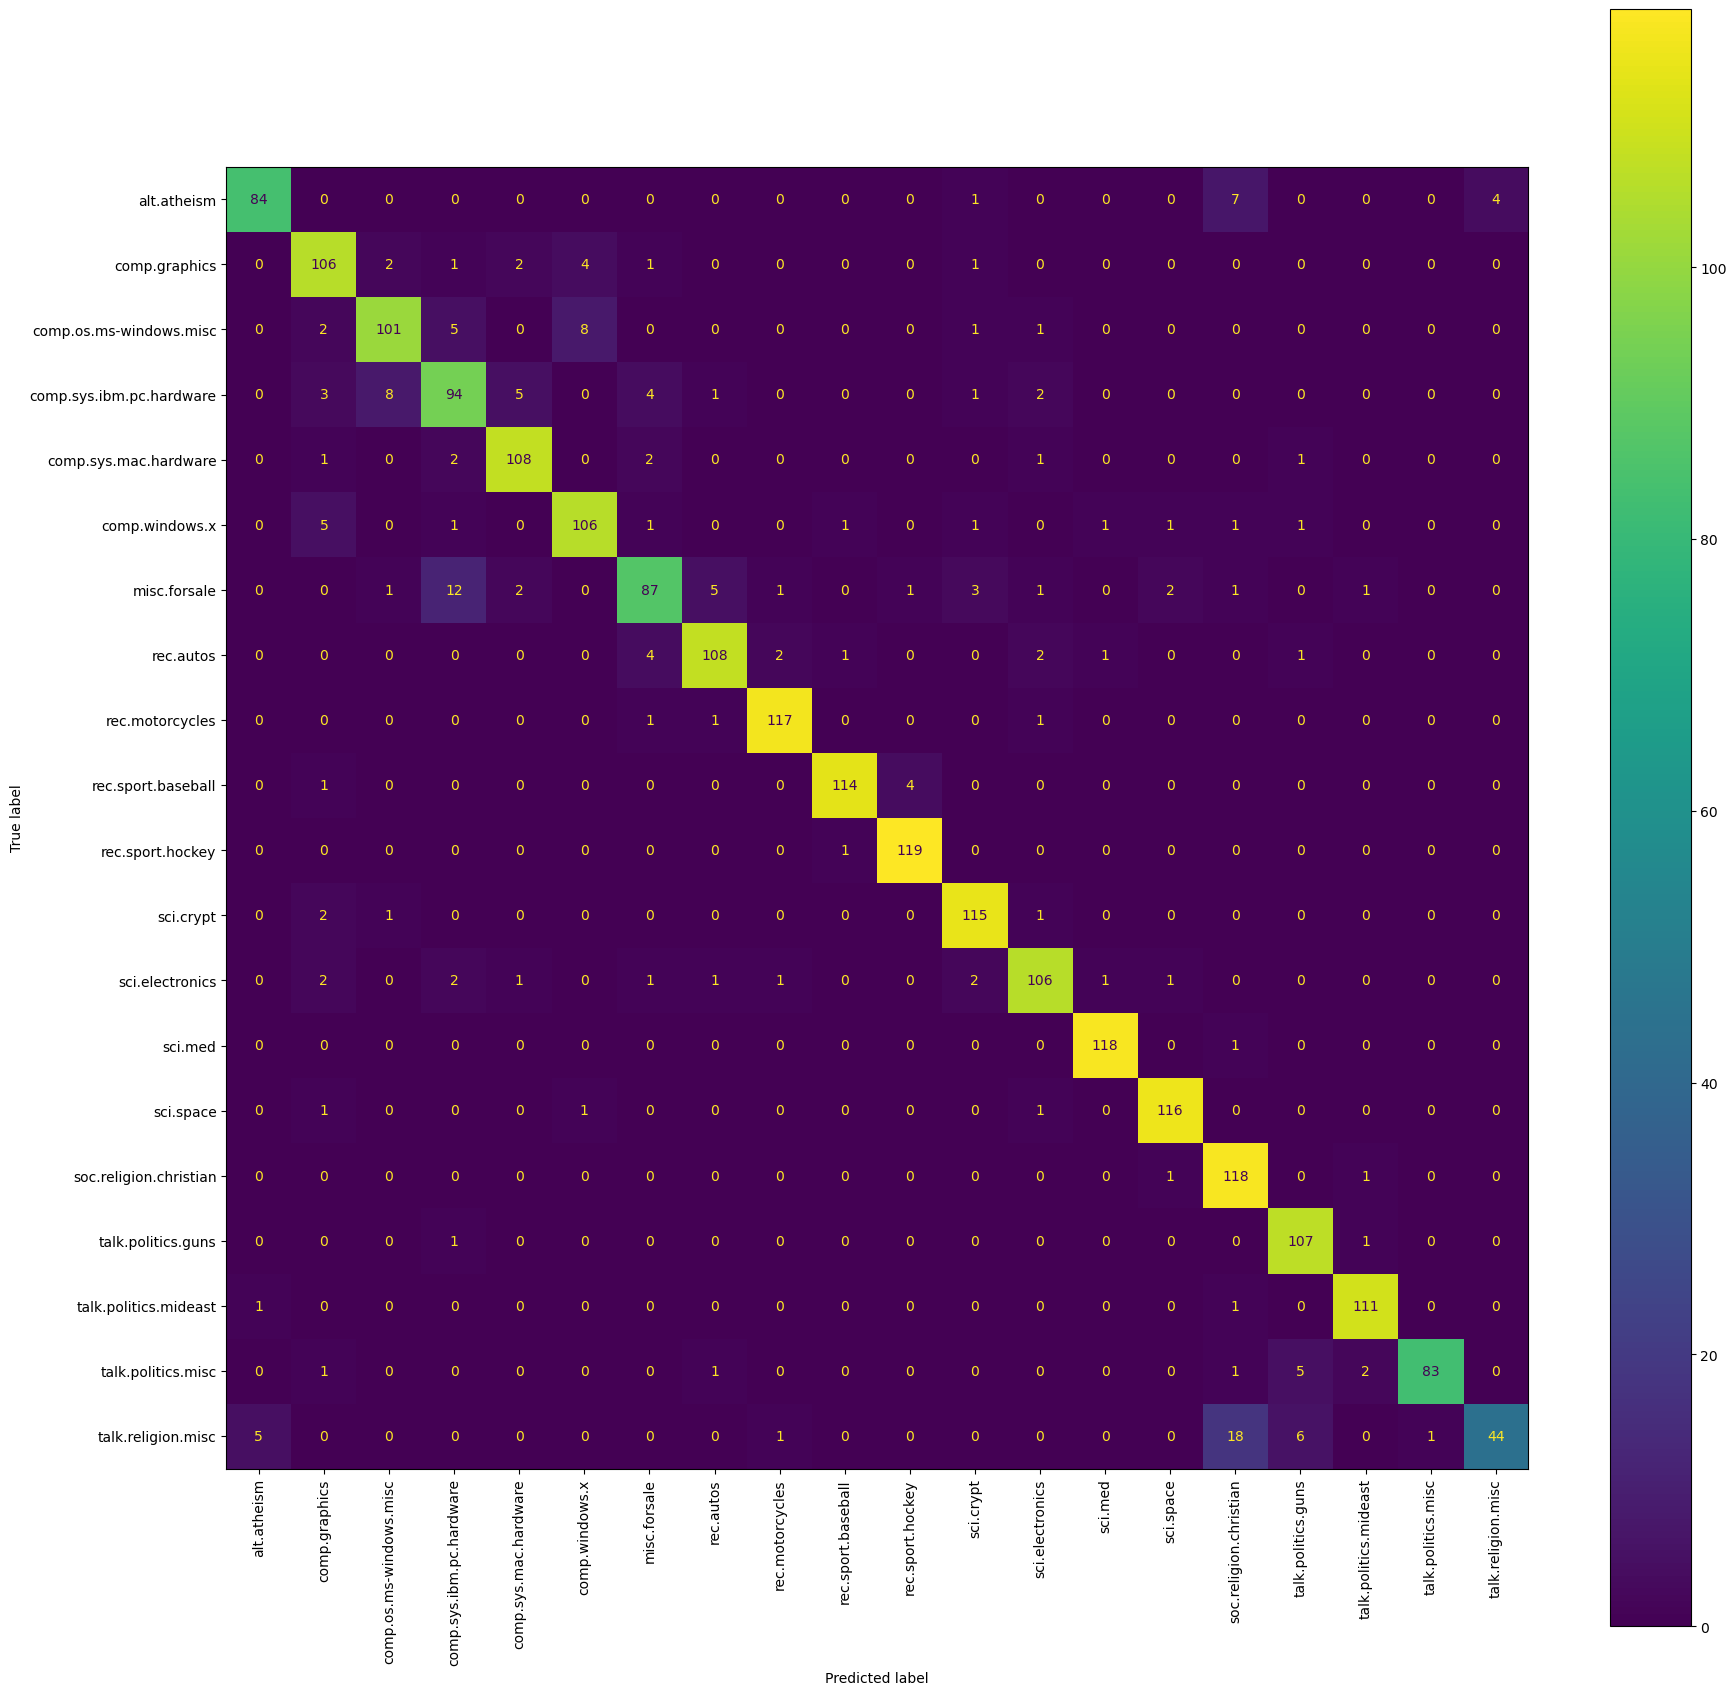

In [47]:
# 3. Plot the confusion matrix of our predictions
# you can use Sklearns `ConfusionMatrixDisplay`

fig, ax = plt.subplots(figsize=(21, 21))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [48]:
# 4. Using `classification_report` print the evaluation results for all the classes. 

print(classification_report(y_test, y_pred, target_names=model.classes_))

                          precision    recall  f1-score   support

             alt.atheism       0.93      0.88      0.90        96
           comp.graphics       0.85      0.91      0.88       117
 comp.os.ms-windows.misc       0.89      0.86      0.87       118
comp.sys.ibm.pc.hardware       0.80      0.80      0.80       118
   comp.sys.mac.hardware       0.92      0.94      0.93       115
          comp.windows.x       0.89      0.89      0.89       119
            misc.forsale       0.86      0.74      0.80       117
               rec.autos       0.92      0.91      0.92       119
         rec.motorcycles       0.96      0.97      0.97       120
      rec.sport.baseball       0.97      0.96      0.97       119
        rec.sport.hockey       0.96      0.99      0.98       120
               sci.crypt       0.92      0.97      0.94       119
         sci.electronics       0.91      0.90      0.91       118
                 sci.med       0.98      0.99      0.98       119
         

# Manual predicition
Write a new sentence that you think will be classified as talk.politics.guns. 
1. Apply the text pipeline to your sentence
2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
    * Note, the `transform` function accepts a list and not a individual string.
3. Use the model to predict your new `X`. 
4. Print the prediction

In [49]:
my_sentence = "Six-in-ten U.S. adults say gun violence is a very big problem in the country today, up 9 percentage points from spring 2022."

# 1. Apply the text pipeline to your sentence

my_sentence = textPipeline(my_sentence)
print(my_sentence)

# 2. Transform your cleaned text using the `X = vectorizer.transform([your_text])`
X = vectorizer.transform([my_sentence])

# 3. Use the model to predict your new `X`. 
model.predict(X)

# 4. Print the prediction
manual_pred = model.predict_proba(X)
for class_name, percentage in zip(model.classes_, manual_pred.round(3)[0]):
    print(class_name, ': ', percentage)

sixinten us adults say gun violence big problem country today 9 percentage points spring 2022
alt.atheism :  0.021
comp.graphics :  0.004
comp.os.ms-windows.misc :  0.002
comp.sys.ibm.pc.hardware :  0.004
comp.sys.mac.hardware :  0.002
comp.windows.x :  0.002
misc.forsale :  0.003
rec.autos :  0.065
rec.motorcycles :  0.026
rec.sport.baseball :  0.05
rec.sport.hockey :  0.022
sci.crypt :  0.04
sci.electronics :  0.004
sci.med :  0.015
sci.space :  0.031
soc.religion.christian :  0.035
talk.politics.guns :  0.429
talk.politics.mideast :  0.115
talk.politics.misc :  0.107
talk.religion.misc :  0.022


___
# PART 2: Twitter Data
This part of the exercise is un-guided on purpose.  

Using the `dem-vs-rep-tweets.csv` build a classifier to determine if a tweet was written by a democrat or republican. 

Can you get an f1-score higher than %82

In [51]:
# 1. Load the 20-newsgroups.csv data into a dataframe.
# 2. Print the shape
df = pd.read_csv('data/dem-vs-rep-tweets.csv')

print(df.shape)
df.head()

(86460, 3)


,Party,Handle,Tweet
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P..."
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...


In [52]:
# 3. Inspect / remove nulls and duplicates
print("Nulls in Dataframe:")
print(df.isnull().sum())

print("Duplicates in Dataframe:")
print(df.duplicated().sum())

Nulls in Dataframe:
Party     0
Handle    0
Tweet     0
dtype: int64
Duplicates in Dataframe:
57


In [53]:
df = df.drop_duplicates()

In [54]:
print('# of duplicates: ',df.duplicated().sum())

# of duplicates:  0


In [55]:
df.Party.value_counts() # find class balances

Republican    44362
Democrat      42041
Name: Party, dtype: int64

In [57]:
df['cleaned'] = df['Tweet'].apply(textPipeline)

print(df['cleaned'][0])
df.head()

today senate dems vote savetheinternet proud support similar netneutrality legislation house httpstcon3tggdlu1l


,Party,Handle,Tweet,cleaned
0,Democrat,RepDarrenSoto,"Today, Senate Dems vote to #SaveTheInternet. P...",today senate dems vote savetheinternet proud s...
1,Democrat,RepDarrenSoto,RT @WinterHavenSun: Winter Haven resident / Al...,rt winterhavensun winter resident alta vista t...
2,Democrat,RepDarrenSoto,RT @NBCLatino: .@RepDarrenSoto noted that Hurr...,rt nbclatino repdarrensoto noted hurricane mar...
3,Democrat,RepDarrenSoto,RT @NALCABPolicy: Meeting with @RepDarrenSoto ...,rt nalcabpolicy meeting repdarrensoto thanks t...
4,Democrat,RepDarrenSoto,RT @Vegalteno: Hurricane season starts on June...,rt vegalteno hurricane season starts june 1st ...


In [58]:
#Vectorization

X = df['cleaned'].values
y = df['Party'].values

In [59]:
# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [60]:
# initializer vectorizer
vectorizer = TfidfVectorizer()

In [61]:
# fit vectorizer
vectorizer.fit(X_train)

TfidfVectorizer()

In [62]:
# transform X data
X_train = vectorizer.transform(X_train)
X_test = vectorizer.transform(X_test)

# print shape of X
print('Shape of training data:', X_train.shape)

Shape of training data: (69122, 112305)


In [63]:
# using grid search to select params
params = { 
    'alpha': [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
    }

grid_search_cv = GridSearchCV(MultinomialNB(), params)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

{'alpha': 0.2}


In [64]:
# initialize multinomialNB model
model = MultinomialNB(alpha=0.2) #using best params

# fit model
model.fit(X_train, y_train)

MultinomialNB(alpha=0.2)

In [65]:
# make predictions on testing data
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

In [67]:
# print accuracy score
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.816677


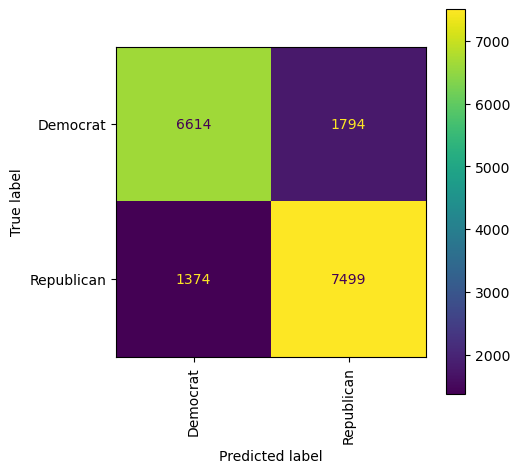

In [68]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [69]:
print(classification_report(y_test, y_pred, target_names=model.classes_))

              precision    recall  f1-score   support

    Democrat       0.83      0.79      0.81      8408
  Republican       0.81      0.85      0.83      8873

    accuracy                           0.82     17281
   macro avg       0.82      0.82      0.82     17281
weighted avg       0.82      0.82      0.82     17281



In [72]:
#hyperparamater tuning

# using grid search to select alpha
params = { 
    'alpha': [0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18],
    'fit_prior': [False, True]
    }

grid_search_cv = GridSearchCV(MultinomialNB(), params)

grid_search_cv.fit(X_train, y_train)

print(grid_search_cv.best_params_)

{'alpha': 0.14, 'fit_prior': True}


In [73]:
# initialize multinomialNB model
model = MultinomialNB(alpha=0.14, fit_prior=True)

# fit model
model.fit(X_train, y_train)

MultinomialNB(alpha=0.14)

In [74]:
# make predictions on testing data
y_pred = model.predict(X_test)

y_pred_proba = model.predict_proba(X_test)

# print accuracy score
accuracy = model.score(X_test, y_test)
print("Model Accuracy: %f" % accuracy)

Model Accuracy: 0.816504


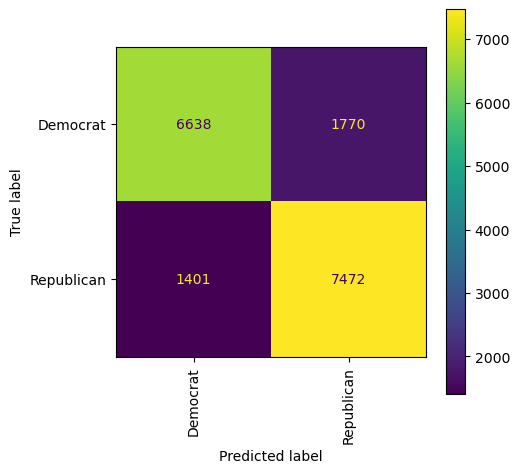

In [75]:
fig, ax = plt.subplots(figsize=(5, 5))
disp = ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, ax=ax);
plt.xticks(rotation=90);

In [77]:
# evaluation results using classification_report
print(classification_report(y_test, y_pred, target_names=model.classes_, digits=4))

              precision    recall  f1-score   support

    Democrat     0.8257    0.7895    0.8072      8408
  Republican     0.8085    0.8421    0.8250      8873

    accuracy                         0.8165     17281
   macro avg     0.8171    0.8158    0.8161     17281
weighted avg     0.8169    0.8165    0.8163     17281



In [78]:
# the F1 score for replublican is 82.5% but the F1 score for democrat is 80.72%